In [ ]:
#!pin install factor_analyzer
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.isnull().sum()
#df = df.dropna()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
#Prepare the data for factor analysis by selecting the relevant columns and converting them into a numpy array

X = df[['traveltime', 'studytime', 'failures']].values


In [ ]:
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(X)


FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
#This will output a matrix of factor loadings, which can be interpreted as the correlation between each variable and each factor. 
#Positive loadings indicate a positive correlation, while negative loadings indicate a negative correlation.

print(fa.loadings_)


[[ 0.12488061  0.29372361 -0.01639186]
 [-0.37913737 -0.17580357  0.11740913]
 [ 0.39931128  0.14591547  0.02966769]]


In [ ]:
print(fa.get_eigenvalues()[0])

[1.24861712 0.92525865 0.82612423]


In [ ]:
print(fa.get_communalities())

[0.10213742 0.18843695 0.18162099]


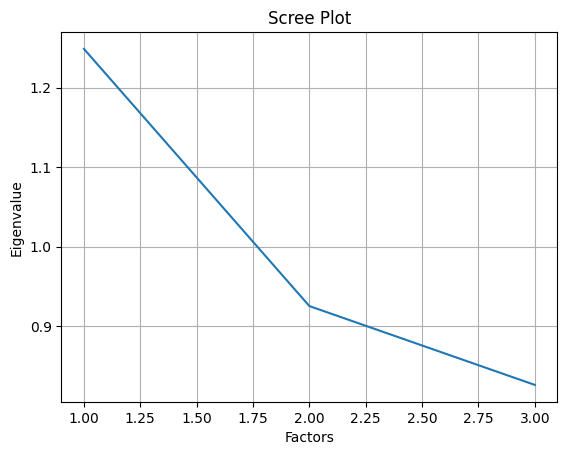

In [ ]:
ev, v = fa.get_eigenvalues()
plt.plot(range(1, len(ev)+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [ ]:
loadings = pd.DataFrame(fa.loadings_, index=['traveltime', 'studytime', 'failures'], columns=['Factor 1', 'Factor 2', 'Factor 3'])
loadings.columns = ['traveltime', 'studytime', 'failures']
print(loadings)


            traveltime  studytime  failures
traveltime    0.124881   0.293724 -0.016392
studytime    -0.379137  -0.175804  0.117409
failures      0.399311   0.145915  0.029668


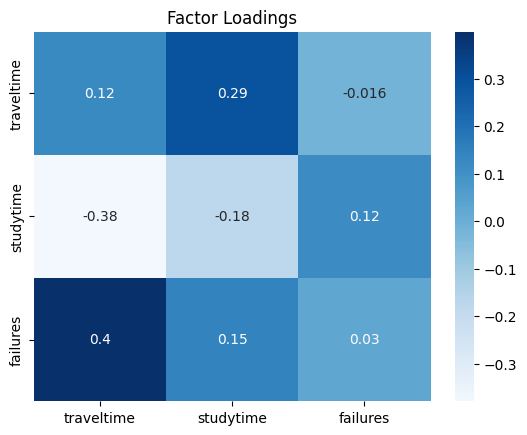

In [ ]:
sns.heatmap(loadings, annot=True, cmap='Blues', center=0)
plt.title('Factor Loadings')
plt.show()